In [1]:
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
iris = pd.read_csv('iris.csv', header=None)
iris.columns = ['Sepal.Length', 'Sepal.Width',
                'Petal.Length', 'Petal.Width', 'Species']
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
X = iris.drop('Species', axis=1)
pca = PCA(n_components=4)
pca.fit(X)

PCA(n_components=4)

In [5]:
pca_components_

NameError: name 'pca_components_' is not defined

In [6]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

uniques = obj.unique()

print(uniques)

['c' 'a' 'd' 'b']


In [ ]:
# Thresholding Numerical Feature Variance

In [54]:
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

iris = datasets.load_iris()

features = iris.data
target = iris.target

thresholder = VarianceThreshold(threshold=.5)

features_high_variance = thresholder.fit_transform(features)

print(features_high_variance[0:5])
print(features[0:5])

[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [55]:
thresholder.fit(features).variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [62]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples = 1000,
                  n_features = 2,
                  random_state = 1)

k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

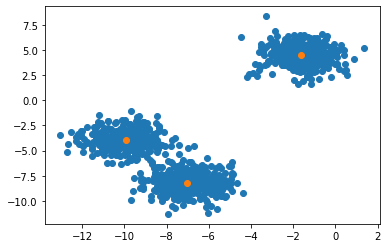

In [63]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])

In [18]:
kmeans.cluster_centers_

array([[-7.80662512, -8.52543977],
       [-1.82851508,  5.3162614 ],
       [-9.9552524 , -3.92910368],
       [-6.25016008, -7.81180777],
       [-1.44251668,  3.70614489]])

In [23]:
for center in kmeans.cluster_centers_:
    print("The centroid is: ", center)

The centroid is:  [-7.80662512 -8.52543977]
The centroid is:  [-1.82851508  5.3162614 ]
The centroid is:  [-9.9552524  -3.92910368]
The centroid is:  [-6.25016008 -7.81180777]
The centroid is:  [-1.44251668  3.70614489]


In [24]:
# Thresholding Binary Feature Variance

In [25]:
from sklearn.feature_selection import VarianceThreshold

features = [[0, 1, 0],
            [0, 1, 1],
            [0, 1, 0],
            [0, 1, 1],
            [1, 0, 0]]

thresholder = VarianceThreshold(threshold=(.75 *(1 - .75)))
thresholder.fit_transform(features)

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [ ]:
# Tokenization p.86

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [28]:
sentences = [
    'Today is a sunny day',
    'Today is a rainy day'
]

In [29]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'today': 1, 'is': 2, 'a': 3, 'day': 4, 'sunny': 5, 'rainy': 6}


In [39]:
sentences = [
    'Today is a sunny day',
    'Today is a rainy day',
    'Is it sunny today?'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

print(sequences)

[[1, 2, 3, 4, 5], [1, 2, 3, 6, 5], [2, 7, 4, 1]]


In [40]:
matrix = tokenizer.sequences_to_matrix

In [41]:
matrix

<bound method Tokenizer.sequences_to_matrix of <keras_preprocessing.text.Tokenizer object at 0x000001521E269F70>>

In [42]:
test_data = [
    'Today is a snowy day',
    'Will it be rainy tomorrow?'
]

In [43]:
test_sequences = tokenizer.texts_to_sequences(test_data)
print(word_index)
print(test_sequences)

{'today': 1, 'is': 2, 'a': 3, 'sunny': 4, 'day': 5, 'rainy': 6, 'it': 7}
[[1, 2, 3, 5], [7, 6]]


In [45]:
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

test_sequences = tokenizer.texts_to_sequences(test_data)
print(word_index)
print(test_sequences)

{'<OOV>': 1, 'today': 2, 'is': 3, 'a': 4, 'sunny': 5, 'day': 6, 'rainy': 7, 'it': 8}
[[2, 3, 4, 1, 6], [1, 8, 1, 7, 1]]


In [52]:
import pprint
sentences = [
    'Today is a sunny day',
    'Today is a rainy day',
    'Is it sunny today?',
    'I really enjoyed walking in the snow today'
]
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
pprint.pprint(sequences)

[[2, 3, 4, 5, 6], [2, 3, 4, 7, 6], [3, 8, 5, 2], [9, 10, 11, 12, 13, 14, 15, 2]]
